In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [21]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [22]:
print(f"Training dataset is {x_train.shape}")

Training dataset is (60000, 28, 28)


In [23]:
print(f"Testing dataset is {x_test.shape}")

Testing dataset is (10000, 28, 28)


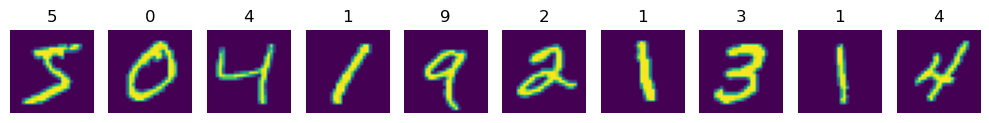

In [24]:
plt.figure(figsize=(10, 2))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='viridis') 
    plt.axis('off')
    plt.title(str(y_train[i]))
plt.tight_layout()
plt.show()

### 1. Randomized Sampling (instead of fixed indices)

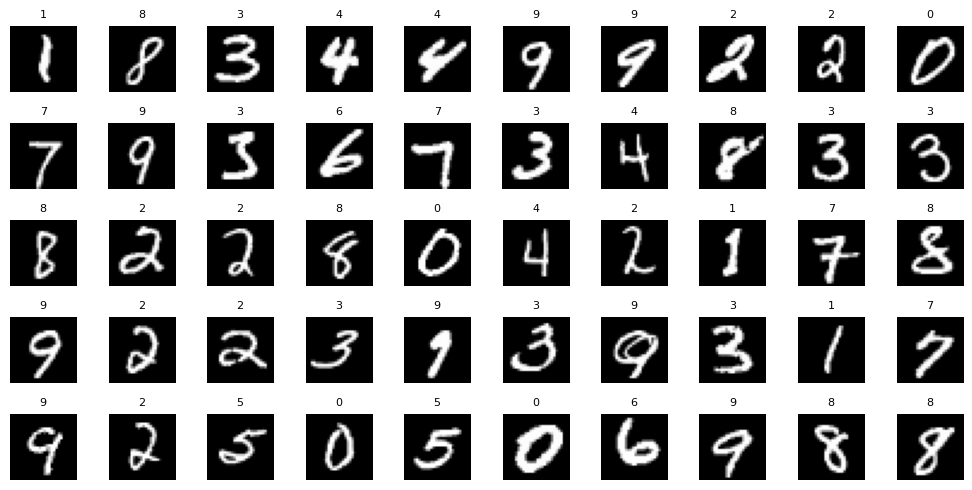

In [25]:
import numpy as np

indices = np.random.choice(len(x_train), 50, replace=False)
plt.figure(figsize=(10, 5))

for i, idx in enumerate(indices):
    plt.subplot(5, 10, i+1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(str(y_train[idx]), fontsize=8)

plt.tight_layout()
plt.show()


### 2. Class-wise Sampling

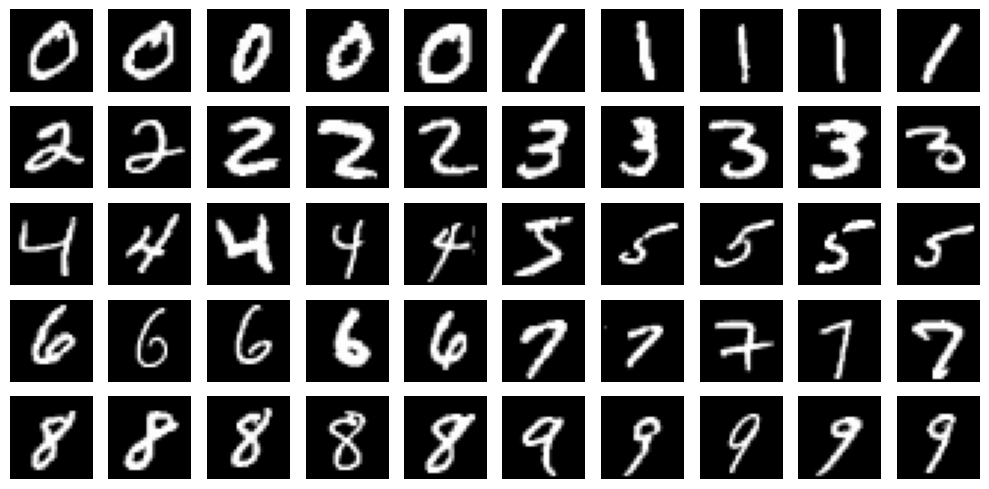

In [26]:
plt.figure(figsize=(10, 5))

for digit in range(10):
    indices = np.where(y_train == digit)[0][:5]  # take first 5 samples of each digit
    for j, idx in enumerate(indices):
        plt.subplot(5, 10, digit*5 + j + 1)
        plt.imshow(x_train[idx], cmap='gray')
        plt.axis('off')
        if j == 0:
            plt.ylabel(str(digit), fontsize=12)  # label each row with the digit

plt.tight_layout()
plt.show()


### 3. Overlay Predictions

In [27]:
### Convolutional Neural Network (CNN)

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Preprocess
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Define simple CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')]
                  )

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']
             )

model.fit(x_train, y_train_cat, 
          epochs=3, 
          batch_size=64, 
          validation_split=0.1
         )


Epoch 1/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9274 - loss: 0.2467 - val_accuracy: 0.9740 - val_loss: 0.0899
Epoch 2/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9756 - loss: 0.0835 - val_accuracy: 0.9812 - val_loss: 0.0667
Epoch 3/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9835 - loss: 0.0552 - val_accuracy: 0.9845 - val_loss: 0.0528


In [28]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']
             )

model.fit(x_test, y_test_cat, 
          epochs=3, 
          batch_size=64, 
          validation_split=0.1
         )

Epoch 1/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9812 - loss: 0.0569 - val_accuracy: 0.9820 - val_loss: 0.0594
Epoch 2/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9910 - loss: 0.0276 - val_accuracy: 0.9840 - val_loss: 0.0649
Epoch 3/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9952 - loss: 0.0181 - val_accuracy: 0.9860 - val_loss: 0.0538
